### Linear Regression - Boston Data

In [6]:
import pandas as pd
import numpy as np


from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

### 1. Problem Statement

In [ ]:
Problem Statement:
    To predict the house price of boston city by using below variables

Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

### 2. Data Gathering

In [2]:
boston_data = load_boston()
dir(boston_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [3]:
# print(boston_data.DESCR)
boston_data.data.shape

(506, 13)

In [4]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston_data.filename

'c:\\users\\rahul\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [6]:
boston_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
df = pd.DataFrame(BOSTON_HOUSE_PRICE.csv, columns = boston_data.feature_names)
df['TARGET'] = boston_data.target
df

NameError: name 'BOSTON_HOUSE_PRICE' is not defined

In [2]:
df.to_csv('BOSTON_HOUSE_PRICE.csv', index = False)

NameError: name 'df' is not defined

In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 3. Exploratory Data Analysis(EDA)

In [ ]:
1. Missing Values
2. Outliers
3. Categorical Data(Object DataTypes)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 4. Feature Engineering

In [ ]:
1. Feature Transformation:
    Log Transformation
    Sqaure root
    box cox
    yeo-johnson
    
2. Impute Missing Values
3. Encoding:
    Label 
    One Hot
    

### 5. Feature Selection/Extraction

In [ ]:
Feature Selection >> Best set of feature
1. Filter Method:(Before model training)
    1. Linearity
    2. VIF
    
2. Wrapper Method(At the time of model training)
3. Embedded Method(After model training)

#### 5.1 Linearity

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

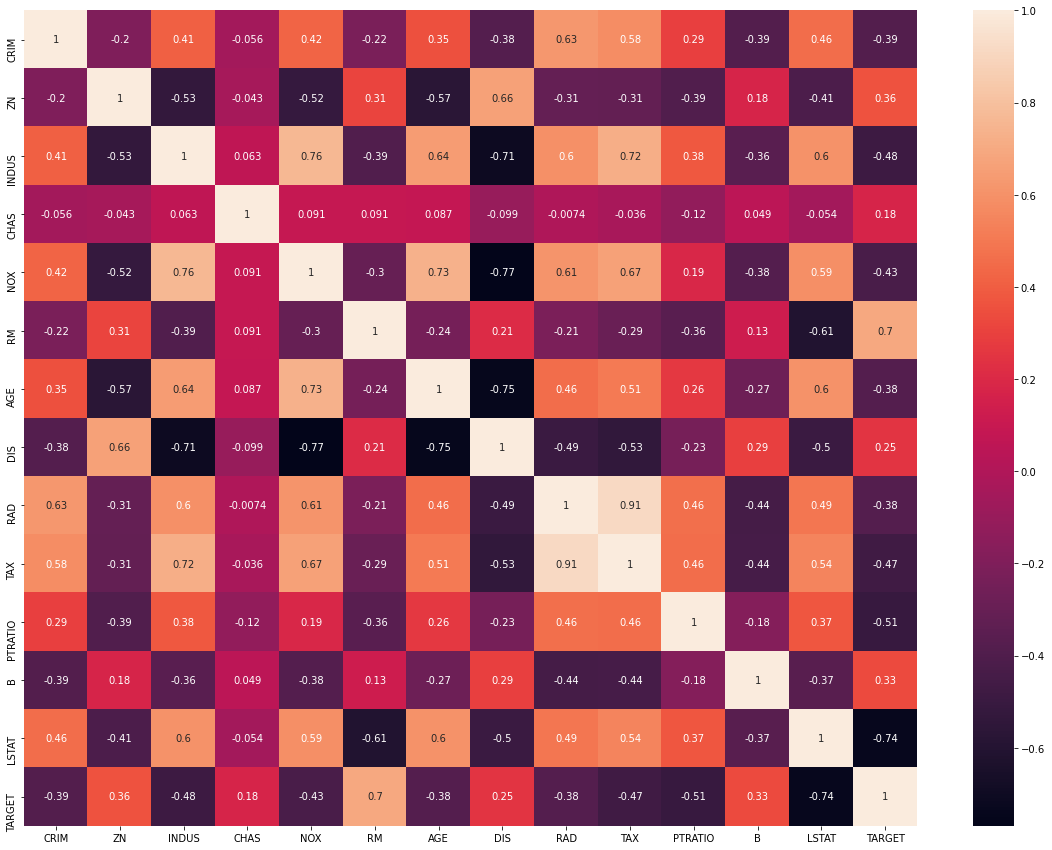

In [12]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True)

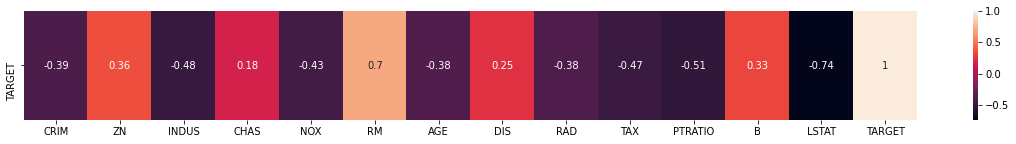

In [13]:
plt.figure(figsize = (20,2))
sns.heatmap(df.corr().tail(1), annot = True)
plt.savefig('Corr.png')

### 2. No Multicolinearity

In [ ]:
No Multicolinearity >> Independence
All independent variables should be independent 
No correlation between independent variables

Variance Inflation Factor:
    VIF method is used to check multicolinearity
    VIF >> Variance Inflation Factor
    Range >> 1 to +inf

    VIF = 1 / (1-R2)
    
R2 >> R-squared value for all independent variables by considering feature as a target column

1. VIF == 1 :(Best Value)
    Variables are not correlated
    Variable is independent
    
2. VIF >> 1 to 5 :
    Variables are moderately correlated
    
3. VIF > 5:
    Variables are Highly correlated

In [14]:
x = df.drop('TARGET', axis = 1)
y = df['TARGET']
# x

##### 2.1 VIF

In [ ]:
variance_inflation_factor(2D_array, index_num)


In [63]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [61]:
variance_inflation_factor(x.to_numpy(), 0)

2.1003728199615224

In [62]:
variance_inflation_factor(x.to_numpy(), 4)

73.89494652814788

In [15]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(), i)
    vif_list.append(vif)

vif_values = pd.Series(vif_list, index = x.columns)
vif_values

CRIM        2.100373
ZN          2.844013
INDUS      14.485758
CHAS        1.152952
NOX        73.894947
RM         77.948283
AGE        21.386850
DIS        14.699652
RAD        15.167725
TAX        61.227274
PTRATIO    85.029547
B          20.104943
LSTAT      11.102025
dtype: float64

In [16]:
vif_list = [variance_inflation_factor(x.to_numpy(), i) for i in range(x.shape[1])]
vif_values = pd.Series(vif_list, index = x.columns)
vif_values

CRIM        2.100373
ZN          2.844013
INDUS      14.485758
CHAS        1.152952
NOX        73.894947
RM         77.948283
AGE        21.386850
DIS        14.699652
RAD        15.167725
TAX        61.227274
PTRATIO    85.029547
B          20.104943
LSTAT      11.102025
dtype: float64

<AxesSubplot:>

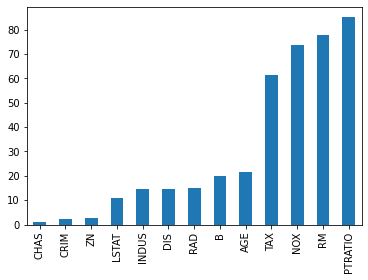

In [19]:
vif_values.sort_values().plot(kind = 'bar')

<AxesSubplot:>

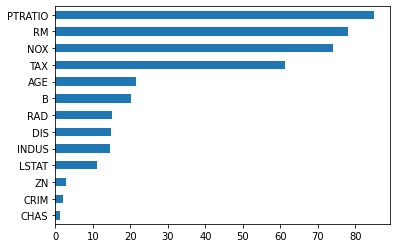

In [21]:
vif_values.sort_values().plot(kind = 'barh')

## 6. Model Training

In [ ]:
506 rows and 14 columns

In [121]:
# df

In [118]:
x = df.drop('TARGET',axis = 1) # independent Variables
y = df['TARGET'] # Dependent variable
# x
# y
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


##### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                   train_size = 0.8,
                                   test_size = 0.2, 
                                   shuffle = True,
                                   stratify=y)

random_state >> Controls the shuffling applied to the data before applying the split
stratify >> Classification:
    equal proportion

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,
                                                   random_state = 11)
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
53,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
247,0.19657,22.0,5.86,0.0,0.431,6.226,79.2,8.0555,7.0,330.0,19.1,376.14,10.15
357,3.84970,0.0,18.10,1.0,0.770,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27


In [119]:
y_test

53     23.4
490     8.1
240    22.0
375    15.0
417    10.4
       ... 
285    22.0
7      27.1
247    20.5
357    21.7
115    18.3
Name: TARGET, Length: 102, dtype: float64

#### Instantiating Linear Regression Model

In [122]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train) # Training of Lienar Regression Model
# Gradient Descent Algorithm

LinearRegression()

In [127]:
np.around(linear_reg.coef_,2)

array([-1.000e-01,  5.000e-02,  2.000e-02,  3.600e+00, -1.902e+01,
        4.240e+00,  1.000e-02, -1.380e+00,  3.000e-01, -1.000e-02,
       -8.900e-01,  1.000e-02, -5.300e-01])

In [124]:
linear_reg.intercept_

31.226462364827746

### Model Evaluation

In [138]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
53,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
247,0.19657,22.0,5.86,0.0,0.431,6.226,79.2,8.0555,7.0,330.0,19.1,376.14,10.15
357,3.84970,0.0,18.10,1.0,0.770,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27


In [140]:
y_test[20:25]

169    22.3
189    34.9
257    50.0
57     31.6
423    13.4
Name: TARGET, dtype: float64

In [141]:
y_pred = linear_reg.predict(x_test)
y_pred.size
y_pred[20:25]

array([26.55565433, 34.62135618, 43.89799599, 33.31654662, 12.85418904])

In [142]:
residual = y_test - y_pred
residual

53     -0.222794
490     4.596135
240    -5.650092
375   -11.281788
417     3.828765
         ...    
285    -5.313484
7       7.231550
247    -0.061954
357    -2.213663
115    -2.082422
Name: TARGET, Length: 102, dtype: float64

In [145]:
# df['TARGET'].sum()

In [147]:
sse = ((y_test - y_pred) ** 2).sum()
sse

2748.3708494508624

In [148]:
y_test.size

102

In [149]:
mse = sse / y_test.size
mse

26.944812249518257

In [150]:
rmse = np.sqrt(mse)
rmse

5.190839262539176

In [157]:
mae = np.abs(y_test - y_pred).sum()/y_test.size

In [152]:
linear_reg.score(x_test, y_test)

0.6859495577055548

In [165]:
# Testing Data Evaluation
y_pred = linear_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value         :",r2_value)

n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1 - ((1 - r2_value) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",adj_r2)

Mean Squared Error      : 26.944812249518257
Root Mean Squared Error : 5.190839262539176
Mean Absolute Error     : 3.567326018996805
R-Squared Value         : 0.6859495577055548
Adjusted R-Squared Value: 0.6395557423666026


In [172]:
# y_train[50:55]

In [173]:
# y_pred_train[50:55]

In [208]:
# Training Data Evaluation
y_pred_train = linear_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value         :",r2_value)

n = x_train.shape[0]
k = x_train.shape[1]
adj_r2 = 1 - ((1 - r2_value) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",adj_r2)

Mean Squared Error      : 20.89839548405952
Root Mean Squared Error : 4.571476291534226
Mean Absolute Error     : 3.254220148215047
R-Squared Value         : 0.7511508467017516
Adjusted R-Squared Value: 0.7428558749251433


In [179]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [185]:
r_squared_list = []
adj_r2_list = []
for i in range(1,x_train.shape[1] + 1):
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(x_train.iloc[:,:i], y_train)
    r2_value = linear_reg_model.score(x_train.iloc[:,:i], y_train)
    r_squared_list.append(r2_value)
    
    n = x_train.shape[0]
    k = i
    adj_r2 = 1 - ((1 - r2_value) * (n-1))/(n-k-1)
    adj_r2_list.append(adj_r2)
    

In [193]:
new_x_train = x_train.copy()
new_x_train['TARGET'] = y_train
new_x_train.corr()['TARGET']

CRIM      -0.384369
ZN         0.348707
INDUS     -0.454460
CHAS       0.176733
NOX       -0.428054
RM         0.716410
AGE       -0.359212
DIS        0.233530
RAD       -0.378549
TAX       -0.451524
PTRATIO   -0.481477
B          0.330353
LSTAT     -0.738672
TARGET     1.000000
Name: TARGET, dtype: float64

In [209]:
r2_data = {"Correlation":new_x_train.corr()['TARGET']
       ,"R-Squared" : r_squared_list,
       "Adj R-Squared": adj_r2_list}

r2_df = pd.DataFrame(r2_data, index = x_train.columns)
r2_df

,Correlation,R-Squared,Adj R-Squared
CRIM,-0.384369,0.147740,0.145619
ZN,0.348707,0.226180,0.222321
INDUS,-0.454460,0.273008,0.267555
CHAS,0.176733,0.312479,0.305587
NOX,-0.428054,0.319255,0.310703
RM,0.716410,0.610994,0.605114
AGE,-0.359212,0.611883,0.605023
DIS,0.233530,0.649985,0.642896
RAD,-0.378549,0.650775,0.642798
TAX,-0.451524,0.656281,0.647535


In [195]:
-0.384369 * -0.384369

0.147739528161

#### Assumption

In [ ]:
1. Linearity
2. No Multicolinearity
3. Normality of Residual
4. Homoscedasticity

## Normality of Residual

In [ ]:
Error or Residual
 
Residual = Ya - Yp

Residual will be positive if datapoint is above the regression line
Residual will be negative if datapoint is below the regression line
Residual will be zero if datapoint is on the regression line

How to Check Normality:
    1. Visualization Tools:(Matplotlib, Seaborn)
        1.1  kdeplot
        1.2  histplot
        1.3  distplot
        
    2. QQ-Plot:
        Powerful technique to check normality
        Quantile-Quantile Plot
        
    3. Hypothesis Testing:
        1. shapiro test
        2. kstest test
        3. normal test
        
    4. Skewness:
        Positive Skewnees
        Negative Skewness
        Symmetric Data

In [196]:
residual = y_train - y_pred_train
residual

188    -2.303035
319    -0.167793
21      1.585797
14     -1.447639
369    15.897274
         ...    
337    -0.794823
91     -5.509147
80     -0.503467
191     0.227312
409     7.133038
Name: TARGET, Length: 404, dtype: float64